In [ ]:
# no export #| default_exp airsim

# Airsim Walkthrough
>  Documentation for using Microsoft Airsim in a Jupyter notebook
>  Airsim is a simulator for drones, cars and more.


In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
# skip_showdoc: true to avoid running cells when rendering docs, and skip_exec: true to skip this notebook when running tests. 
# this should be a raw cell 

In [ ]:
#| hide
from fastcore.utils import *
import cv2
import numpy as np
from imutils import resize

import time

In [ ]:

# logging.basicConfig(format='%(asctime)-8s,%(msecs)-3d %(levelname)5s [%(filename)10s:%(lineno)3d] %(message)s',
#                     datefmt='%H:%M:%S',
#                     level=logging.INFO)  # Todo add this to params
# logger = logging.getLogger(__name__)

In [ ]:
#| hide
from nbdev.showdoc import *
from nbdev.showdoc import *
from fastcore.test import *


In [ ]:
from mavcom.utils.display import *
from mavcom.utils.sim_linux import *
from mavcom.airsim.client import *
# import mavcom.utils.sim_linux as sim


### Airsim Connection

In [ ]:
show_doc(RunSim)

---

### RunSim

>      RunSim (name:str='Coastline', resx:int=800, resy:int=600,
>              windowed:str|None='windowed',
>              settings:str|pathlib.Path|None=None)

Run the Airsim simulator

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| name | str | Coastline | name of the simulator environment |
| resx | int | 800 | window size  x |
| resy | int | 600 | window size  y |
| windowed | str \| None | windowed | windowed or fullscreen |
| settings | str \| Path \| None | None | settings file |

In [ ]:
rs = RunSim("AirSimNH", settings="config/airsim_settings_high_res.json")

ERROR|10.762| mavcom.RunSim      | sim_linux.: 73 | MainThread | MainProces | Settings file config/settings_high_res.json not found.
INFO |10.763| mavcom.RunSim      | sim_linux.: 75 | MainThread | MainProces | Settings file None found.


Airsim AirSimNH already running.


In [ ]:
show_doc(AirSimClient)

---

### AirSimClient

>      AirSimClient (ip='', port:int=41451, timeout_value=3600)

Multirotor Client for the Airsim simulator with higher level procedures

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| ip | str |  | rpc connection address |
| port | int | 41451 | rpc connection port |
| timeout_value | int | 3600 | timeout for client ping in seconds |

In [ ]:
asc = AirSimClient()

Connected!
Client Ver:1 (Min Req: 1), Server Ver:1 (Min Req: 1)


### Simulator  assets 
assets can be listed with `rs.client.simListAssets()`
and placed within the environment with `rs.place_asset(x,y,z,asset_name)`

In [ ]:
show_doc(asc.simListAssets)

---

### VehicleClient.simListAssets

>      VehicleClient.simListAssets ()

Lists all the assets present in the Asset Registry

Returns:
    list[str]: Names of all the assets

In [ ]:
assets = asc.simListAssets()
print(f"Assets: {assets}")

Assets: ['Sphere', 'Cone', 'Cylinder', 'SM_SkySphere', 'Garage_Door_01offset', 'Garage_Mech_01', 'Garage_Door_02offset', 'Garage_Half_Mech_01', 'Inner_Door_01', 'Hinge_01', 'Outer_Door_01', 'Fan_Blades_01', 'Fan_Base_01', 'Outer_Wall_Quart_Win_06', 'Veranda_01', 'Street_Sign_02', 'Street_Sign_01', 'Stop_Sign_02', 'Stop_Sign_01', 'Rock_01', 'Power_Line_Connector_01', 'Power_Line_Complete_01', 'Power_Line_Cable_Single_01', 'Power_Line_Cable_01_Spline', 'Power_Line_01', 'Path_01', 'Monument_01', 'Garden_Tressel_02', 'Garden_Tressel_01', 'Garden_Rocks_01', 'Garden_Chair_01', 'Fence_01', 'Drain_Pipe_02', 'Drain_Pipe_01', 'Car_01', 'bin_02', 'bin_01', 'Bench_01', 'Basketball_Hoop_01', 'Skateboard_01', 'Plug_Socket_01', 'Picture_Frame_01', 'Paint_Can_01', 'Mug_01', 'Light_Switch_01', 'Fridge_Alphabet_01', 'extractor_01', 'Dufflebag_01', 'Drinks_Can_07', 'Drinks_Can_06', 'Drinks_Can_05', 'Drinks_Can_04', 'Drinks_Can_03', 'Drinks_Can_01', 'Curtain_03', 'Curtain_02', 'Curtain_01', 'Book_01', 'To

In [ ]:
show_doc(AirSimClient.place_object)

---

### AirSimClient.place_object

>      AirSimClient.place_object (name:str, x:float, y:float, z:float,
>                                 scale:float=1.0, physics_enabled:bool=False)

Place an object in the simulator
First check to see if the asset it is based on exists

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| name | str |  | asset name |
| x | float |  | position x |
| y | float |  | position y |
| z | float |  | position z |
| scale | float | 1.0 | scale |
| physics_enabled | bool | False | physics enabled |

In [ ]:
asc.place_object("Sofa_02", 5.0, 0.0, -1.0, scale=0.5 )

The sofa can be seen at the location with `rs.client.simGetObjectPose("Sofa_02")`
The sofa can be moved with `rs.move_asset(x,y,z,asset_name)`

In [ ]:
show_doc(asc.simGetObjectPose)

---

### VehicleClient.simGetObjectPose

>      VehicleClient.simGetObjectPose (object_name)

The position inside the returned Pose is in the world frame

Args:
    object_name (str): Object to get the Pose of

Returns:
    Pose:

In [ ]:
asc.simGetObjectPose("Sofa_02")

<Pose> {   'orientation': <Quaternionr> {   'w_val': nan,
    'x_val': nan,
    'y_val': nan,
    'z_val': nan},
    'position': <Vector3r> {   'x_val': nan,
    'y_val': nan,
    'z_val': nan}}

In [ ]:
show_doc(AirSimClient.get_image)

---

### AirSimClient.get_image

>      AirSimClient.get_image (camera_name:str='0', rgb2bgr:bool=False)

Get an image from camera `camera_name`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| camera_name | str | 0 | camera name |
| rgb2bgr | bool | False | convert to bgr |
| **Returns** | **ndarray** |  | **image** |

Show the image with `show_image(img)` here we can see the camera placed at the takeoff point looking at the sofa

Todo not sure why we have to *rgd2bgr* it

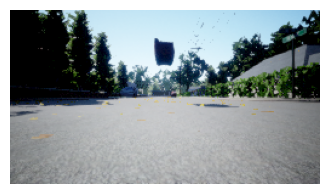

In [ ]:
img = asc.get_image(rgb2bgr=True)
ax = show_image(img)

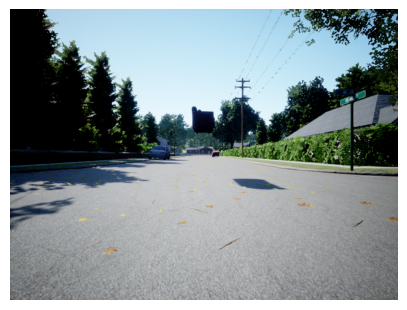

In [ ]:
img = asc.get_image("center", rgb2bgr=True)
ax = show_image(img)

In [ ]:
show_doc(AirSimClient.get_images)

In [ ]:
cams = ["high_res", "front_center", "front_right", "front_left", "bottom_center", "back_center"]
imgs = asc.get_images(cams, rgb2bgr=True)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
_,axs = plt.subplots(3,2,figsize=(12,10))
for i,ax in enumerate(axs.flatten()): show_image(imgs[i], ax=ax, title=f' {cams[i]}')

In [ ]:
show_doc(AirSimClient.simGetCameraInfo)

In [ ]:
show_doc(RunSim.exit)

In [ ]:
rs.exit()

### Run a loop grabbing the camera

In [ ]:
rs = RunSim("AirSimNH", settings="config/settings_high_res.json")

asc = AirSimClient()

framecounter = 1
cam_num = 0
cams = ["high_res", "front_center", "front_right", "front_left", "bottom_center", "back_center"]
with VideoWriter("images/airsim_test.mp4", 5.0) as video:
    while(True):
        framecounter += 1
        
        img = asc.get_image(cams[cam_num], rgb2bgr=False)
        puttext(img, f"Frame: {framecounter}")
        img_bgr = resize(img, width=500)
        cv2.imshow("Camera", img)
        
        video.add(img_bgr)
        k = cv2.waitKey(10)
        if k == ord('q') or k == ord('Q') or k == 27:
            break
        
        if k == ord('c') or k == ord('C'):
            cam_num += 1
            if cam_num >= len(cams):
                cam_num = 0
            print(f"Camera: {cams[cam_num]}")
        if framecounter > 50:
            break
    cv2.destroyAllWindows()
    rs.exit()
video.show(width=500)

In [ ]:
#| hide
# from nbdev import nbdev_export
# nbdev_export()